In [1]:
#importamos las librerias
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#leemos el shapefile que utilizaremos como información principal
radios = gpd.read_file('../data/caba_radios_censales.geojson')
radios.index = radios.RADIO_ID.values
radios.head()

,RADIO_ID,BARRIO,COMUNA,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,geometry
1_1_1,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"MULTIPOLYGON (((-58.37189 -34.59199, -58.37202..."
1_12_1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"MULTIPOLYGON (((-58.38593 -34.60444, -58.38575..."
1_12_10,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"MULTIPOLYGON (((-58.37879 -34.60528, -58.37741..."
1_12_11,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"MULTIPOLYGON (((-58.36733 -34.60562, -58.36713..."
1_12_2,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"MULTIPOLYGON (((-58.38454 -34.60436, -58.38311..."


# Coropletas

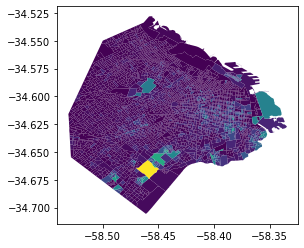

In [6]:
#podemos hacer una coropleta con una sola linea
radios.plot(column='HOGARES_NBI')

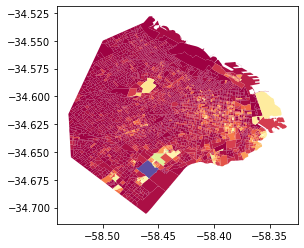

In [7]:
#podemos elegir otra paleta de colores
radios.plot(column='HOGARES_NBI',cmap='Spectral')

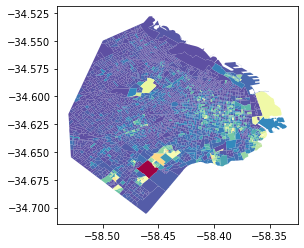

In [8]:
#cada paleta tiene su inverso
radios.plot(column='HOGARES_NBI',cmap='Spectral_r')

In [9]:
#creamos una variable de porcentaje de hogares con NBI
radios['NBI'] = radios.HOGARES_NBI / radios.HOGARES * 100

In [11]:
#cuidado, que hay 0 en el denominador
radios.HOGARES.min()

0.0

In [12]:
#esto genera que haya nulls en NBI porque no se puede dividir por 0
radios.NBI.isnull().sum()

2

In [14]:
radios.shape

(3554, 10)

In [13]:
#borramos los NA
radios_nbi = radios.dropna(axis='index',subset=['NBI'])
radios_nbi.shape

(3552, 10)

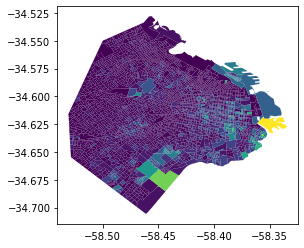

In [15]:
radios_nbi.plot(column='NBI')

## Ejes, figuras y paletas: otros elementos de visualización

Ahora profundizaremos en los elementos que conforman un gráfico como las [figuras](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html) y los [ejes y subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html). Pueden ver un [tutorial básico](https://matplotlib.org/users/pyplot_tutorial.html) de Matplotlib en su página. 

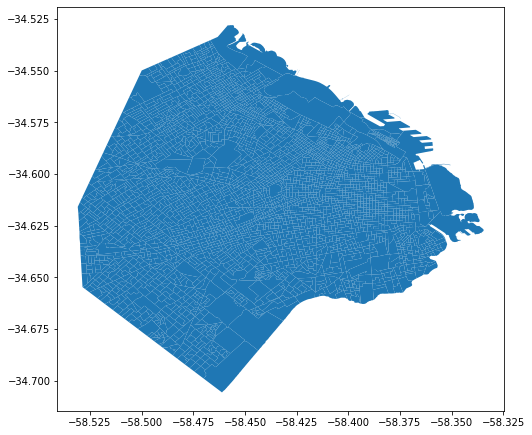

In [18]:
#forma breve de hacer un par de ejes y una figura en una sola linea
f, ax = plt.subplots(1,figsize=(8,8))
#hacemos un plot y lo asignamos a esos ejes
radios.plot(ax=ax)

#Aqui tiene un hilo de debate util sobre este tema
#https://github.com/geopandas/geopandas/issues/735


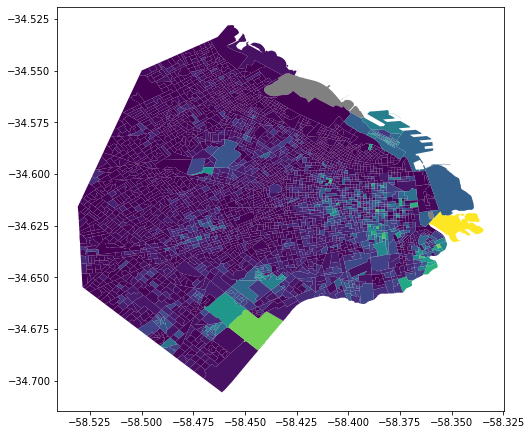

In [20]:
f, ax = plt.subplots(1,figsize=(8,8))
radios.loc[radios.HOGARES==0,:].plot(ax=ax,color='grey')
radios_nbi.plot(ax=ax,column='NBI')


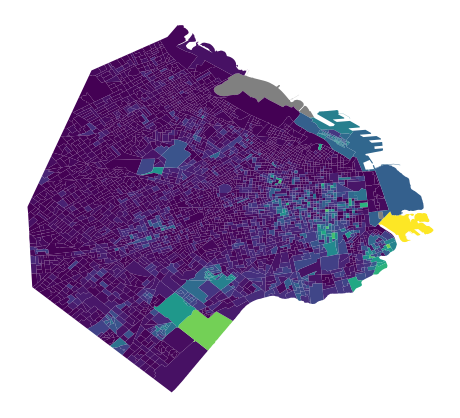

In [30]:
f, ax = plt.subplots(1,figsize=(8,8))
radios.loc[radios.HOGARES==0,:].plot(ax=ax,color='grey')
radios_nbi.plot(ax=ax,column='NBI')
#evitamos la visualizacion de los ejes
ax.set_axis_off()

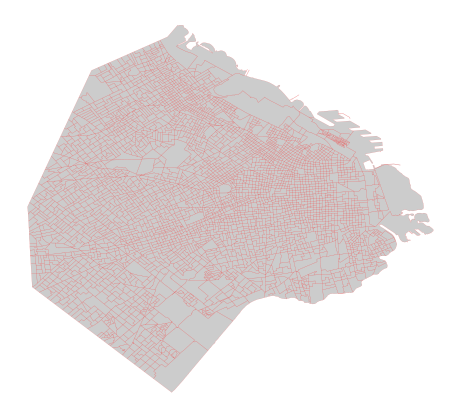

In [35]:
f, ax = plt.subplots(1,figsize=(8,8))
#agregamos algunas especificaciones sobre los colores a los diferentes elementos del polígono
radios.plot(linewidth=0.2,
            facecolor='grey',
            edgecolor='red', ax=ax, alpha = 0.4)
ax.set_axis_off()

In [37]:
#vamos a cargar unos shapes que sirven de insumo para la visualizacion
rios = gpd.read_file('../data/rios.geojson')
rios = rios.to_crs(radios.crs)
parques = gpd.read_file('../data/parques.geojson')
parques = parques.to_crs(radios.crs)

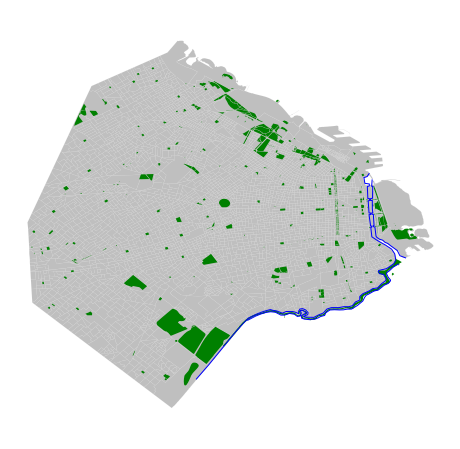

In [40]:
f, ax = plt.subplots(1,figsize=(8,8))
radios.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
plt.axis('equal')
ax.set_axis_off()


## Paletas de colores

También existen paletas de colores predefinidas que podemos utilizar, como las que usamos previamente *Spectral*. El uso de la paleta no es inocente y hay estrategias de visualización que uno puede seguir de acuerdo a si quiere mostrar constrastes con paletas divergentes o mostrar intensidades variantes con paletas gradientes, etc. Para más información y mayor nivel de detalle sobre las paletas o mapas de colores pueden consultar el sitio de [Matplotlilb](https://matplotlib.org/users/colormaps.html)

In [42]:
from matplotlib.colors import rgb2hex

In [43]:
#Utilzaremos la paleta terrain
cm = plt.get_cmap('terrain')
cm

In [44]:
#que tipo es?
type(cm)

matplotlib.colors.LinearSegmentedColormap

In [45]:
#entonces como accedo a los colores que estan dentro de la paleta si no hay un list?
list(cm)

TypeError: 'LinearSegmentedColormap' object is not iterable

In [46]:
#entre 0. y 1. tengo el gradiente de colores del mapa (no es lo mismo 1 que 1., prueben)
cm(0.)

(0.2, 0.2, 0.6, 1.0)

In [47]:
#1 es todo luz en todas los canales de colores
cm(1.)

(1.0, 1.0, 1.0, 1.0)

In [48]:
#obtengo 3 colores
cm([0.,0.5,1.])

array([[0.2       , 0.2       , 0.6       , 1.        ],
       [0.99607843, 0.99498039, 0.59788235, 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [49]:
#quiero 3 colores entre 0 y 1
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [50]:
#creamos nuestra paleta
colores = cm(np.linspace(0,1,4))

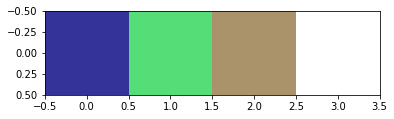

In [51]:
#la visualizamos
plt.imshow([colores])

In [52]:
#creamos nuestros colores a partir de una paleta
azul = rgb2hex(colores[0][:3])
verde = rgb2hex(colores[1][:3])
tierra = rgb2hex(colores[2][:3])

In [53]:
rgb2hex(colores[0])

'#333399'

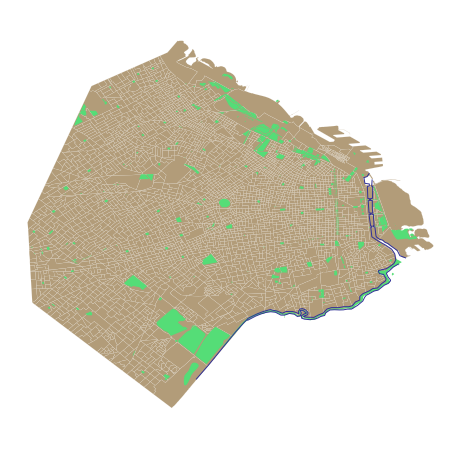

In [55]:
#usamos nuestros colores en un mapa
f, ax = plt.subplots(1,figsize=(8,8))
radios.plot(linewidth=0.1, facecolor=tierra, edgecolor='white', ax=ax, alpha = 0.9)
rios.plot(ax=ax, color=azul,linewidth=1)
parques.plot(ax=ax, color=verde)
plt.axis('equal')
ax.set_axis_off()
plt.show()

Probablemente sea el mapa más feo jamás hecho. Por eso pueden usar colores totalmente definidos por ustedes. Una página que es un gran recurso para obtener colores es [Paletton](http://paletton.com/)  

NameError: name 'verdes' is not defined

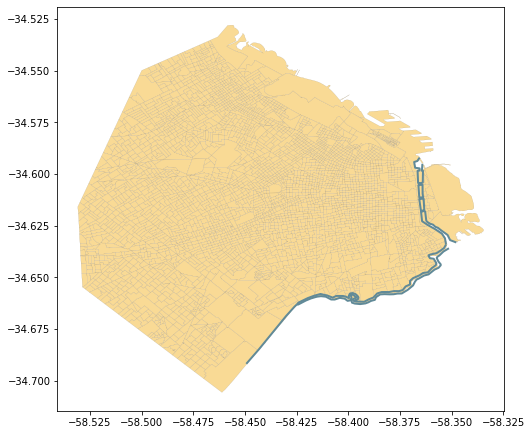

In [56]:
f, ax = plt.subplots(1,figsize=(8,8))
radios.plot(linewidth=0.1, facecolor='#F9DA95', edgecolor='#787064', ax=ax, alpha = 1)
rios.plot(ax=ax, color='#618A98',linewidth=2)
verdes.plot(ax=ax, color='#AE4B16')
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [ ]:
# Finalmente podemos guardar nuestro mapa en una imagen PNG
f.savefig('../img/buenos_aires.png', dpi=1080)

# Analisis de NBI por diferentes unidades espaciales

Comentamos que los radios no siempre constituyen unidades espaciales que den cuenta de los procesos subyacentes que inciden en nuestros datos. Es por eso que muchas veces vamos a querer partir de radios censales y llevar los datos a otras unidades espaciales. Por ejemplo, podemos considerar que las COMUNAS pueden ser geografías sginificativas en este sentido. Este procedimiento tiene su versión más sencilla (veremos otras más complejas más adelante) cuando tenemos unidades espaciales anidadas. Es decir, que se contienen mutuamente tal cual sucede con las COMUNAS, FRACCIONES y RADIOS. Procuraremos realizar un análisis de la distribución de NBI por comuna.  

In [ ]:
radios_nbi.NBI.describe()

In [ ]:
radios_nbi.plot?

In [ ]:
f, ax = plt.subplots(1,figsize=(8,8))
#realizamos el mismo mapa, ahora graficando por quintiles
radios_nbi.plot(column='NBI',
                linewidth=0.1,
                ax=ax, scheme = 'Fisher_Jenks',k=5,legend=True)
plt.axis('equal')
ax.set_axis_off()


## Los datos en tablas

In [ ]:
#nosotros ya sabemos de la clase anterior como obtener un estadístico resumen agrupado por una variable común
tabla_nbi = radios_nbi.loc[:,['COMUNA','NBI']].groupby('COMUNA').mean()
tabla_nbi.sort_values(by='NBI',ascending = False).head()

In [ ]:
#tenemos otra forma similar de lograr lo mismo, pasando una funcion que será agregada para todos los elementos de la misma comuna
#en este caso la funcion promedio de numpy
tabla_nbi = radios_nbi.loc[:,['COMUNA','NBI']].groupby('COMUNA').agg(np.average)
tabla_nbi.sort_values(by='NBI',ascending = False).head()

#### ¿Por qué agregar esta complejidad? 

Porque nuestro análisis requiere ser más complejo. No podemos hacer un promedio simple del NBI dado que no existe la misma cantidad de hogares en cada radio. Por lo tanto, lo que debemos hacer es un promedio ponderado. Nuestra función que se agregue debe realizar un promedio con pesos. Afortundamente la función de promedios de `Numpy` nos permite hacer esto. 

Veamos un ejemplo sencillo que luego escalaremos al conjunto de los datos:

In [ ]:
#creemos un caso sencillo para probar y luego si funciona podemos extrapolar 
dt = pd.DataFrame({'COMUNA':[1,1,2,2],
                  'NBI':[50.,10.,90.,10],
                   'T_HOGAR':[0,2,100,2]})
dt

In [ ]:
dt.loc[:,['COMUNA','NBI']].groupby('COMUNA').agg(np.average)

In [ ]:
np.average?

In [ ]:
np.average(a = dt.NBI)

In [ ]:
np.average(a = dt.NBI,weights = dt.T_HOGAR)

#### ¿Cómo funciona GroupBy con Aggregate?

Funciona de modo similar a si hiciesemos los siguientes pasos:

* Separamos la parte de los datos de la comuna 1
* Calculamos el promedio
* Guardamos ese dato en una UNICA FILA en otro data set
* Repetimos para todas las columnas

In [ ]:
#seleccionamos
x = dt.loc[dt.COMUNA == 2]
x = np.average(a = x.NBI,weights = x.T_HOGAR)
x

In [ ]:
#definimos una funcion que tome un dataset, que va a ser el dataset de cada comuna
#y devuelva 
def promedio_ponder(dt):
    """
    Proruce un promedio ponderado de NBI a partir del total de HOGARES
    ...
    
    Argumentos
    ---------
    dt     : pandas.DataFrame
            DataFrame que contiene los radios con NBI por COMUNA  
    
    Devuelve
    -------
    average : float
            El promedio ponderado de NBI por el total de hogares
    """
    return np.average(a = dt.NBI, weights = dt.T_HOGAR)

In [ ]:
dt.loc[:,['COMUNA','T_HOGAR','NBI']]\
            .groupby('COMUNA')\
            .agg(promedio_ponder)

In [ ]:
tabla_nbi_pon = radios_nbi.loc[:,['COMUNA','T_HOGAR','NBI']]\
                    .groupby('COMUNA')\
                    .agg(promedio_ponder)
tabla_nbi_pon = tabla_nbi_pon.drop('T_HOGAR',axis=1)
tabla_nbi_pon.columns = ['NBI_prom']
tabla_nbi_pon = tabla_nbi_pon\
                    .sort_values(by='NBI_prom',ascending = False)
tabla_nbi_pon.head()

Comparando el desempeño con el promedio simple vemos que la Comuna 3, que parecía ser casí idéntica a la Comuna 8, ahora aparece peor en el ranking dada la diferencia de población (Comuna 3 siendo mas poblada)

In [ ]:
tabla_nbi_pon.to_csv('../data/nbi_x_comuna.csv')

In [ ]:
tabla_nbi.sort_values(by='NBI',ascending = False).head()

In [ ]:
f, ax = plt.subplots(1,figsize=(8,8))
#realizamos el mismo mapa, ahora graficando por quintiles
radios_nbi.loc[radios_nbi.COMUNA==1,:].plot(
    column='NBI',
    linewidth=0.1,
    ax=ax,
    scheme = 'quantiles',
    k=7,legend=True)
plt.axis('equal')
ax.set_axis_off()


#### Y el desvio?

No existe funcion que produzca un desvio ponderado, pero sucede que si existe para la covarianza. Sabiendo que el desvío es la raíz cuadrada de la covarianza, podemos calcularlo. Solo es cuestion de tiempo hasya que se incluya el parametro weights en `numpy.std()`

In [ ]:
#gracias a :
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
def desvio_ponder(dt):
    """
    Produce un desvio ponderado de NBI a partir del total de HOGARES
    ...
    
    Argumentos
    ---------
    dt     : pandas.DataFrame
            DataFrame que contiene los radios con NBI por COMUNA  
    
    Devuelve
    -------
    desvio : float
            El desvio ponderado de NBI por el total de hogares
    """
    return np.sqrt(np.cov(m = dt.NBI, aweights=dt.T_HOGAR))


In [ ]:
#calculamos la tabla de desvio
tabla_nbi_std = radios_nbi.loc[:,['COMUNA','T_HOGAR','NBI']].groupby('COMUNA').agg(desvio_ponder)
tabla_nbi_std = tabla_nbi_std.drop('T_HOGAR',axis=1)
tabla_nbi_std.columns = ['NBI_std']
tabla_nbi_std = tabla_nbi_std.sort_values(by='NBI_std',ascending = False)
tabla_nbi_std.head()

In [ ]:
#utilizaremos la funcion merge para unir ambos datos
pd.merge?

In [ ]:
tabla = pd.merge(left =  tabla_nbi_pon,right = tabla_nbi_std,left_index=True,right_index=True)
tabla.head()

In [ ]:
#https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
f, ax = plt.subplots(1,figsize=(8,6))
ax.scatter(tabla.NBI_prom,tabla.NBI_std)

for i, txt in enumerate(tabla.index):
    ax.annotate(txt, (tabla.NBI_prom.iloc[i],
                      tabla.NBI_std.iloc[i]),
                horizontalalignment='left', 
                verticalalignment='bottom')

ax.set_xlabel('Promedio')
ax.set_ylabel(u'Desvío estandar');

In [ ]:
#realizamos el mismo mapa, ahora graficando por terciles para ver la disparidad de la Comuna 1
f, ax = plt.subplots(1,figsize=(8,8))
radios_nbi.loc[radios_nbi.COMUNA == 1,:].plot(
    column='NBI',
    linewidth=0.1, ax=ax, scheme = 'quantiles',k=3,legend=True)
plt.axis('equal')
ax.set_axis_off()

Sin embargo, como la coropleta es una visualización unidimensional, solo podemos captar el efecto de una de las variables. El promedio de NBI. No podemos ver la cantidad de población. Si observan bien en esta coropleta uno puede decir que la Comuna 1 tiene Retiro y Puerto Madero como sectores on muy bajo NBI.

Podemos cambiar la estrategia de visualización y pasar a usar puntos. Esto nos permite visualizar 2 variables al mismo tiempo. Para ello cambiamos las geometrias de poligonos a puntos obteniendo el **centroide** de cada poligono.

In [ ]:
#seleccionamos Comuna 1 y algunas variables
centroides = radios_nbi.loc[radios_nbi.COMUNA == 1,['NBI','TOTAL_POB','geometry']]
centroides.head()

In [ ]:
#ccambiamos la geometria a centroide
centroides.loc[:,'geometry'] = centroides.geometry.centroid
centroides.head()

Podemos visualizar esto en forma de puntos a partir de los centroides, lo que nos permite visualizar dos variables usando tamaños y colores


In [ ]:
#usamos markersize para mostrar la poblacion
f, ax = plt.subplots(1,figsize=(8,8))
centroides.plot(column='NBI',linewidth=0.1, 
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.TOTAL_POB/7)
plt.axis('equal')
ax.set_axis_off()
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')
f.savefig('centroides_comuna1.png')

## La Cartografia de comunas

In [ ]:
#ya tenemos los datos, pero necesitamos una cartografia de comunas
#si bien existe y podemos bajarla, podríamos crearla a partir de agregar o disolver unidades espaciales existentes
comunas = radios.dissolve('COMUNA')
comunas.head()

In [ ]:
#vemos que los datos no nos sirvem porque no son un agregado, sino los del primer registro de cada comuna. entonces los eliminamos
comunas = comunas.reindex(columns = ['geometry'])
comunas.head(2)

In [ ]:
#ploteamos
comunas.plot()

In [ ]:
#veamos nuestra comuna 1
#este es un ejemplo de indice real bien utilizado
comuna1 = comunas.loc[1,'geometry']
#chequeamos el tipo
type(comuna1)

In [ ]:
comuna1

Vemos que es un objeto Polygon de Shapely. Y ahora podemos entender que significa los `interiors` de este objeto. Vemos en la visualizacion que hay unas "astillas" producto de radios que no estan perfectamente alineados. Esos espacios vacíos dentro de un polígono se expresan como un LinearRing cuyo sentido  de construcción es opuesto al de los LinearRing Exteriores.

![interiord](http://toblerity.org/shapely/_images/polygon.png)

In [ ]:
#y ahora si podemos ver los interiores, 
list(comuna1.interiors)

In [ ]:
comuna1.buffer(1)

In [ ]:
#podemos utilizar el buffer como herramienta para eliminar las astillas
#pero esto haría que se superpongan las comunas, porque todas tendrian un buffer  
#si vemos el original en rojo y el buffer en verde, vemos que lo supera
f, ax = plt.subplots(1,figsize=(8,8))
gpd.GeoSeries(comuna1.buffer(100)).plot(ax=ax, color = 'green')
gpd.GeoSeries(comuna1).plot(ax=ax, color = 'red')

plt.axis('equal')
ax.set_axis_off()

In [ ]:
#si hacemos el negativo, vemos que el rojo original lo supera
f, ax = plt.subplots(1,figsize=(8,8))
gpd.GeoSeries(comuna1).plot(ax=ax, color = 'red')
gpd.GeoSeries(comuna1.buffer(-100)).plot(ax=ax, color = 'blue')
plt.axis('equal')
ax.set_axis_off()

In [ ]:
#por lo tanto tenemos que combinar agregarle y substraerle para que en los bordes quede bien
comunas.loc[:,'geometry'] = comunas.geometry.map(lambda x: x.buffer(1).buffer(-1))
comunas.head()

In [ ]:
comunas.plot()

## Unir los datos

In [ ]:
tabla.head()

In [ ]:
#Ya tenemos nuestra cartografia y nuetros datos
#podemos hacerlo por comunas en comun o por el indice
comunas = comunas.merge(tabla,left_index=True,right_index=True)
comunas['cv'] = comunas.NBI_prom / comunas.NBI_std * 100
comunas.head()

In [ ]:
plt.subplots?

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
comunas.plot(column = 'NBI_prom',ax=ax1,scheme='quantiles',k=3,legend=True)
comunas.plot(column = 'cv',ax=ax2,scheme='quantiles',k=3,legend=True)
plt.axis('equal')
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title('Hogares con NBI (en %) - Por Comuna - 2010')
ax2.set_title('Hogares con NBI - Coeficiente de variación (en %) - Por Comuna - 2010')

# Un poco de interactividad

In [ ]:
import mplleaflet

In [ ]:
f, ax = plt.subplots(1,figsize=(8,8))
ax = comunas.plot(ax=ax)
mplleaflet.display(fig=ax.figure, crs=comunas.crs)

In [ ]:
f, ax = plt.subplots(1,figsize=(8,8))
comunas.plot(column='NBI_prom',scheme='quantiles', ax=ax)
mplleaflet.display(fig=f, crs=comunas.crs)

In [ ]:
f, ax = plt.subplots(1)
comunas.plot(column='NBI_prom', ax=ax)
mplleaflet.display(fig=f, crs=comunas.crs,tiles='cartodb_positron') 

In [ ]:
f, ax = plt.subplots(1)
comunas.plot(column='NBI_prom', ax=ax)
mplleaflet.display(fig=f, crs=comunas.crs,tiles='stamen_wc') 

In [ ]:
#opciones de mapas base
#    'osm',
#    'mapquest open',
#    'mapbox bright',
#    'thunderforest_landscape',
##    'esri_aerial',
#    'stamen_wc',
#    'stamen_toner',
#    'esri_natgeo',
#    'cartodb_positron',
#    'esri_worldtopo'


In [ ]:
mplleaflet.show(fig=f, crs=comunas.crs, tiles='cartodb_positron', path='mapa.html')
